# Quality Check and Data Visualization

In [2]:
# Import modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import re
from datetime import datetime

In [4]:
#@title Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/mrch-hub/bangkit1/master/SolarPrediction.csv')
data = data.reindex(np.random.permutation(data.index)) # shuffle dataset
data.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
11652,1476720623,10/17/2016 12:00:00 AM,06:10:23,2.47,48,30.45,29,176.91,6.75,06:18:00,17:58:00
6324,1473069904,9/5/2016 12:00:00 AM,00:05:04,2.55,48,30.44,79,168.91,5.62,06:08:00,18:35:00
12142,1476570024,10/15/2016 12:00:00 AM,12:20:24,1011.80,70,30.50,18,5.54,5.62,06:17:00,17:59:00
20691,1479144904,11/14/2016 12:00:00 AM,07:35:04,22.38,48,30.47,63,83.88,6.75,06:31:00,17:43:00
7394,1472731809,9/1/2016 12:00:00 AM,02:10:09,3.26,51,30.41,103,158.09,4.50,06:07:00,18:38:00
16580,1480379718,11/28/2016 12:00:00 AM,14:35:18,682.39,57,30.41,62,26.38,3.37,06:39:00,17:42:00
19348,1479548121,11/18/2016 12:00:00 AM,23:35:21,1.22,45,30.44,73,163.69,5.62,06:33:00,17:43:00
16539,1480392004,11/28/2016 12:00:00 AM,18:00:04,1.22,48,30.43,69,74.89,10.12,06:39:00,17:42:00
6514,1473011708,9/4/2016 12:00:00 AM,07:55:08,409.55,58,30.46,86,90.61,3.37,06:08:00,18:35:00
12431,1476481224,10/14/2016 12:00:00 AM,11:40:24,995.36,62,30.47,60,25.68,10.12,06:17:00,18:00:00


In [5]:
# Look at the Statistics ot the data
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [5]:
# Quick Check on the Dataset for NULL Values & Data Types
print('--------------------------------NULL DATAS---------------------------------\n')
print(data.isnull().sum())
print('\n------------------------------DATA TYPES-----------------------------------\n')
print(data.info())

--------------------------------NULL DATAS---------------------------------

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

------------------------------DATA TYPES-----------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32686 entries, 11652 to 13213
Data columns (total 11 columns):
UNIXTime                  32686 non-null int64
Data                      32686 non-null object
Time                      32686 non-null object
Radiation                 32686 non-null float64
Temperature               32686 non-null int64
Pressure                  32686 non-null float64
Humidity                  32686 non-null int64
WindDirection(Degrees)    32686 non-null float64
Speed                     3

In [6]:
#@title Convert UNIXTime

# Get more info on the UNIXTime
dataset = data.sort_values('UNIXTime', ascending = True)

dataset['Time_Convert'] = pd.to_datetime(dataset['Time'], format = '%H:%M:%S')

dataset['Hour'] = pd.to_datetime(dataset['Time_Convert'], format = '%H:%M:%S').dt.hour # Get the hour of the day

dataset['Day'] = pd.to_datetime(dataset['UNIXTime'].astype(int), unit = 's').dt.day # Get the day of the month

dataset['Month'] = pd.to_datetime(dataset['UNIXTime'].astype(int), unit = 's').dt.month # Get the month of the year

dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Hour,Day,Month
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,11.557425,16.018204,10.489353
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,6.912034,8.712438,1.235468
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,0.000000,1.000000,1.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,6.000000,9.000000,10.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,12.000000,16.000000,11.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,18.000000,24.000000,11.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,23.000000,31.000000,12.000000


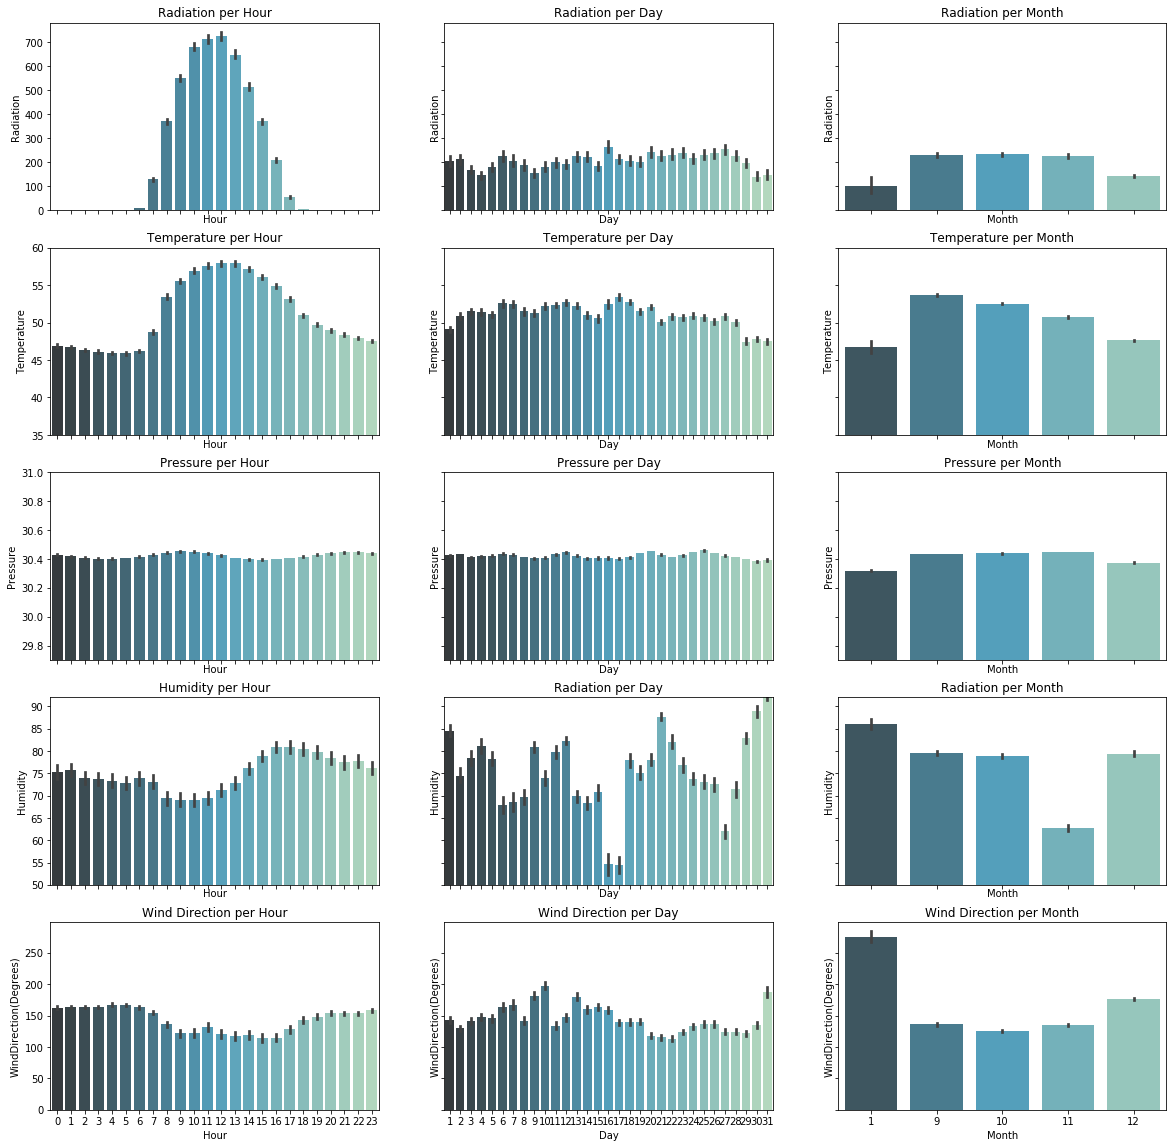

In [7]:
# Visualize the data to get more insight
f, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12), (ax13,ax14,ax15)) = plt.subplots(5, 3, sharex = 'col', sharey = 'row', figsize = (20,20))

# Limit Y values range
ax4.set_ylim(35,60)
ax7.set_ylim(29.7,31)
ax10.set_ylim(50,92)

#----------------------------------Plot Radiation vs Time------------------------------------#
ax1.set_title('Radiation per Hour')
sns.barplot(x = 'Hour', y = 'Radiation', data = dataset, palette = "GnBu_d", ax = ax1)

ax2.set_title('Radiation per Day')
sns.barplot(x = 'Day', y = 'Radiation', data = dataset, palette = "GnBu_d", ax = ax2)

ax3.set_title('Radiation per Month')
sns.barplot(x = 'Month', y = 'Radiation', data = dataset, palette = "GnBu_d", ax = ax3)

#---------------------------------Plot Temperature vs Time-----------------------------------#

ax4.set_title('Temperature per Hour')
sns.barplot(x = 'Hour', y = 'Temperature', data = dataset, palette = "GnBu_d", ax = ax4)

ax5.set_title('Temperature per Day')
sns.barplot(x = 'Day', y = 'Temperature', data = dataset, palette = "GnBu_d", ax = ax5)

ax6.set_title('Temperature per Month')
sns.barplot(x = 'Month', y = 'Temperature', data = dataset, palette = "GnBu_d", ax = ax6)

#-----------------------------------Plot Pressure vs Time------------------------------------#

ax7.set_title('Pressure per Hour')
sns.barplot(x = 'Hour', y = 'Pressure', data = dataset, palette = "GnBu_d", ax = ax7)

ax8.set_title('Pressure per Day')
sns.barplot(x = 'Day', y = 'Pressure', data = dataset, palette = "GnBu_d", ax = ax8)

ax9.set_title('Pressure per Month')
sns.barplot(x = 'Month', y = 'Pressure', data = dataset, palette = "GnBu_d", ax = ax9)

#-----------------------------------Plot Humidity vs Time------------------------------------#

ax10.set_title('Humidity per Hour')
sns.barplot(x = 'Hour', y = 'Humidity', data = dataset, palette = "GnBu_d", ax = ax10)

ax11.set_title('Radiation per Day')
sns.barplot(x = 'Day', y = 'Humidity', data = dataset, palette = "GnBu_d", ax = ax11)

ax12.set_title('Radiation per Month')
sns.barplot(x = 'Month', y = 'Humidity', data = dataset, palette = "GnBu_d", ax = ax12)

#--------------------------------Plot Wind Direction vs Time---------------------------------#

ax13.set_title('Wind Direction per Hour')
sns.barplot(x = 'Hour', y = 'WindDirection(Degrees)', data = dataset, palette = "GnBu_d", ax = ax13)

ax14.set_title('Wind Direction per Day')
sns.barplot(x = 'Day', y = 'WindDirection(Degrees)', data = dataset, palette = "GnBu_d", ax = ax14)

ax15.set_title('Wind Direction per Month')
sns.barplot(x = 'Month', y = 'WindDirection(Degrees)', data = dataset, palette = "GnBu_d", ax = ax15)

In [12]:
# Merge the two columns to get the time and date for each data
x = [i.replace('12:00:00 AM', '') for i in data['Data']]

data['Date-Time'] = x + data['Time']
data['Date-Time'] = pd.to_datetime(data['Date-Time'])

data.head(15)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Date-Time
11652,1476720623,10/17/2016 12:00:00 AM,06:10:23,2.47,48,30.45,29,176.91,6.75,06:18:00,17:58:00,2016-10-17 06:10:23
6324,1473069904,9/5/2016 12:00:00 AM,00:05:04,2.55,48,30.44,79,168.91,5.62,06:08:00,18:35:00,2016-09-05 00:05:04
12142,1476570024,10/15/2016 12:00:00 AM,12:20:24,1011.80,70,30.50,18,5.54,5.62,06:17:00,17:59:00,2016-10-15 12:20:24
20691,1479144904,11/14/2016 12:00:00 AM,07:35:04,22.38,48,30.47,63,83.88,6.75,06:31:00,17:43:00,2016-11-14 07:35:04
7394,1472731809,9/1/2016 12:00:00 AM,02:10:09,3.26,51,30.41,103,158.09,4.50,06:07:00,18:38:00,2016-09-01 02:10:09
16580,1480379718,11/28/2016 12:00:00 AM,14:35:18,682.39,57,30.41,62,26.38,3.37,06:39:00,17:42:00,2016-11-28 14:35:18
19348,1479548121,11/18/2016 12:00:00 AM,23:35:21,1.22,45,30.44,73,163.69,5.62,06:33:00,17:43:00,2016-11-18 23:35:21
16539,1480392004,11/28/2016 12:00:00 AM,18:00:04,1.22,48,30.43,69,74.89,10.12,06:39:00,17:42:00,2016-11-28 18:00:04
6514,1473011708,9/4/2016 12:00:00 AM,07:55:08,409.55,58,30.46,86,90.61,3.37,06:08:00,18:35:00,2016-09-04 07:55:08
12431,1476481224,10/14/2016 12:00:00 AM,11:40:24,995.36,62,30.47,60,25.68,10.12,06:17:00,18:00:00,2016-10-14 11:40:24


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]), <a list of 11 Text yticklabel objects>)

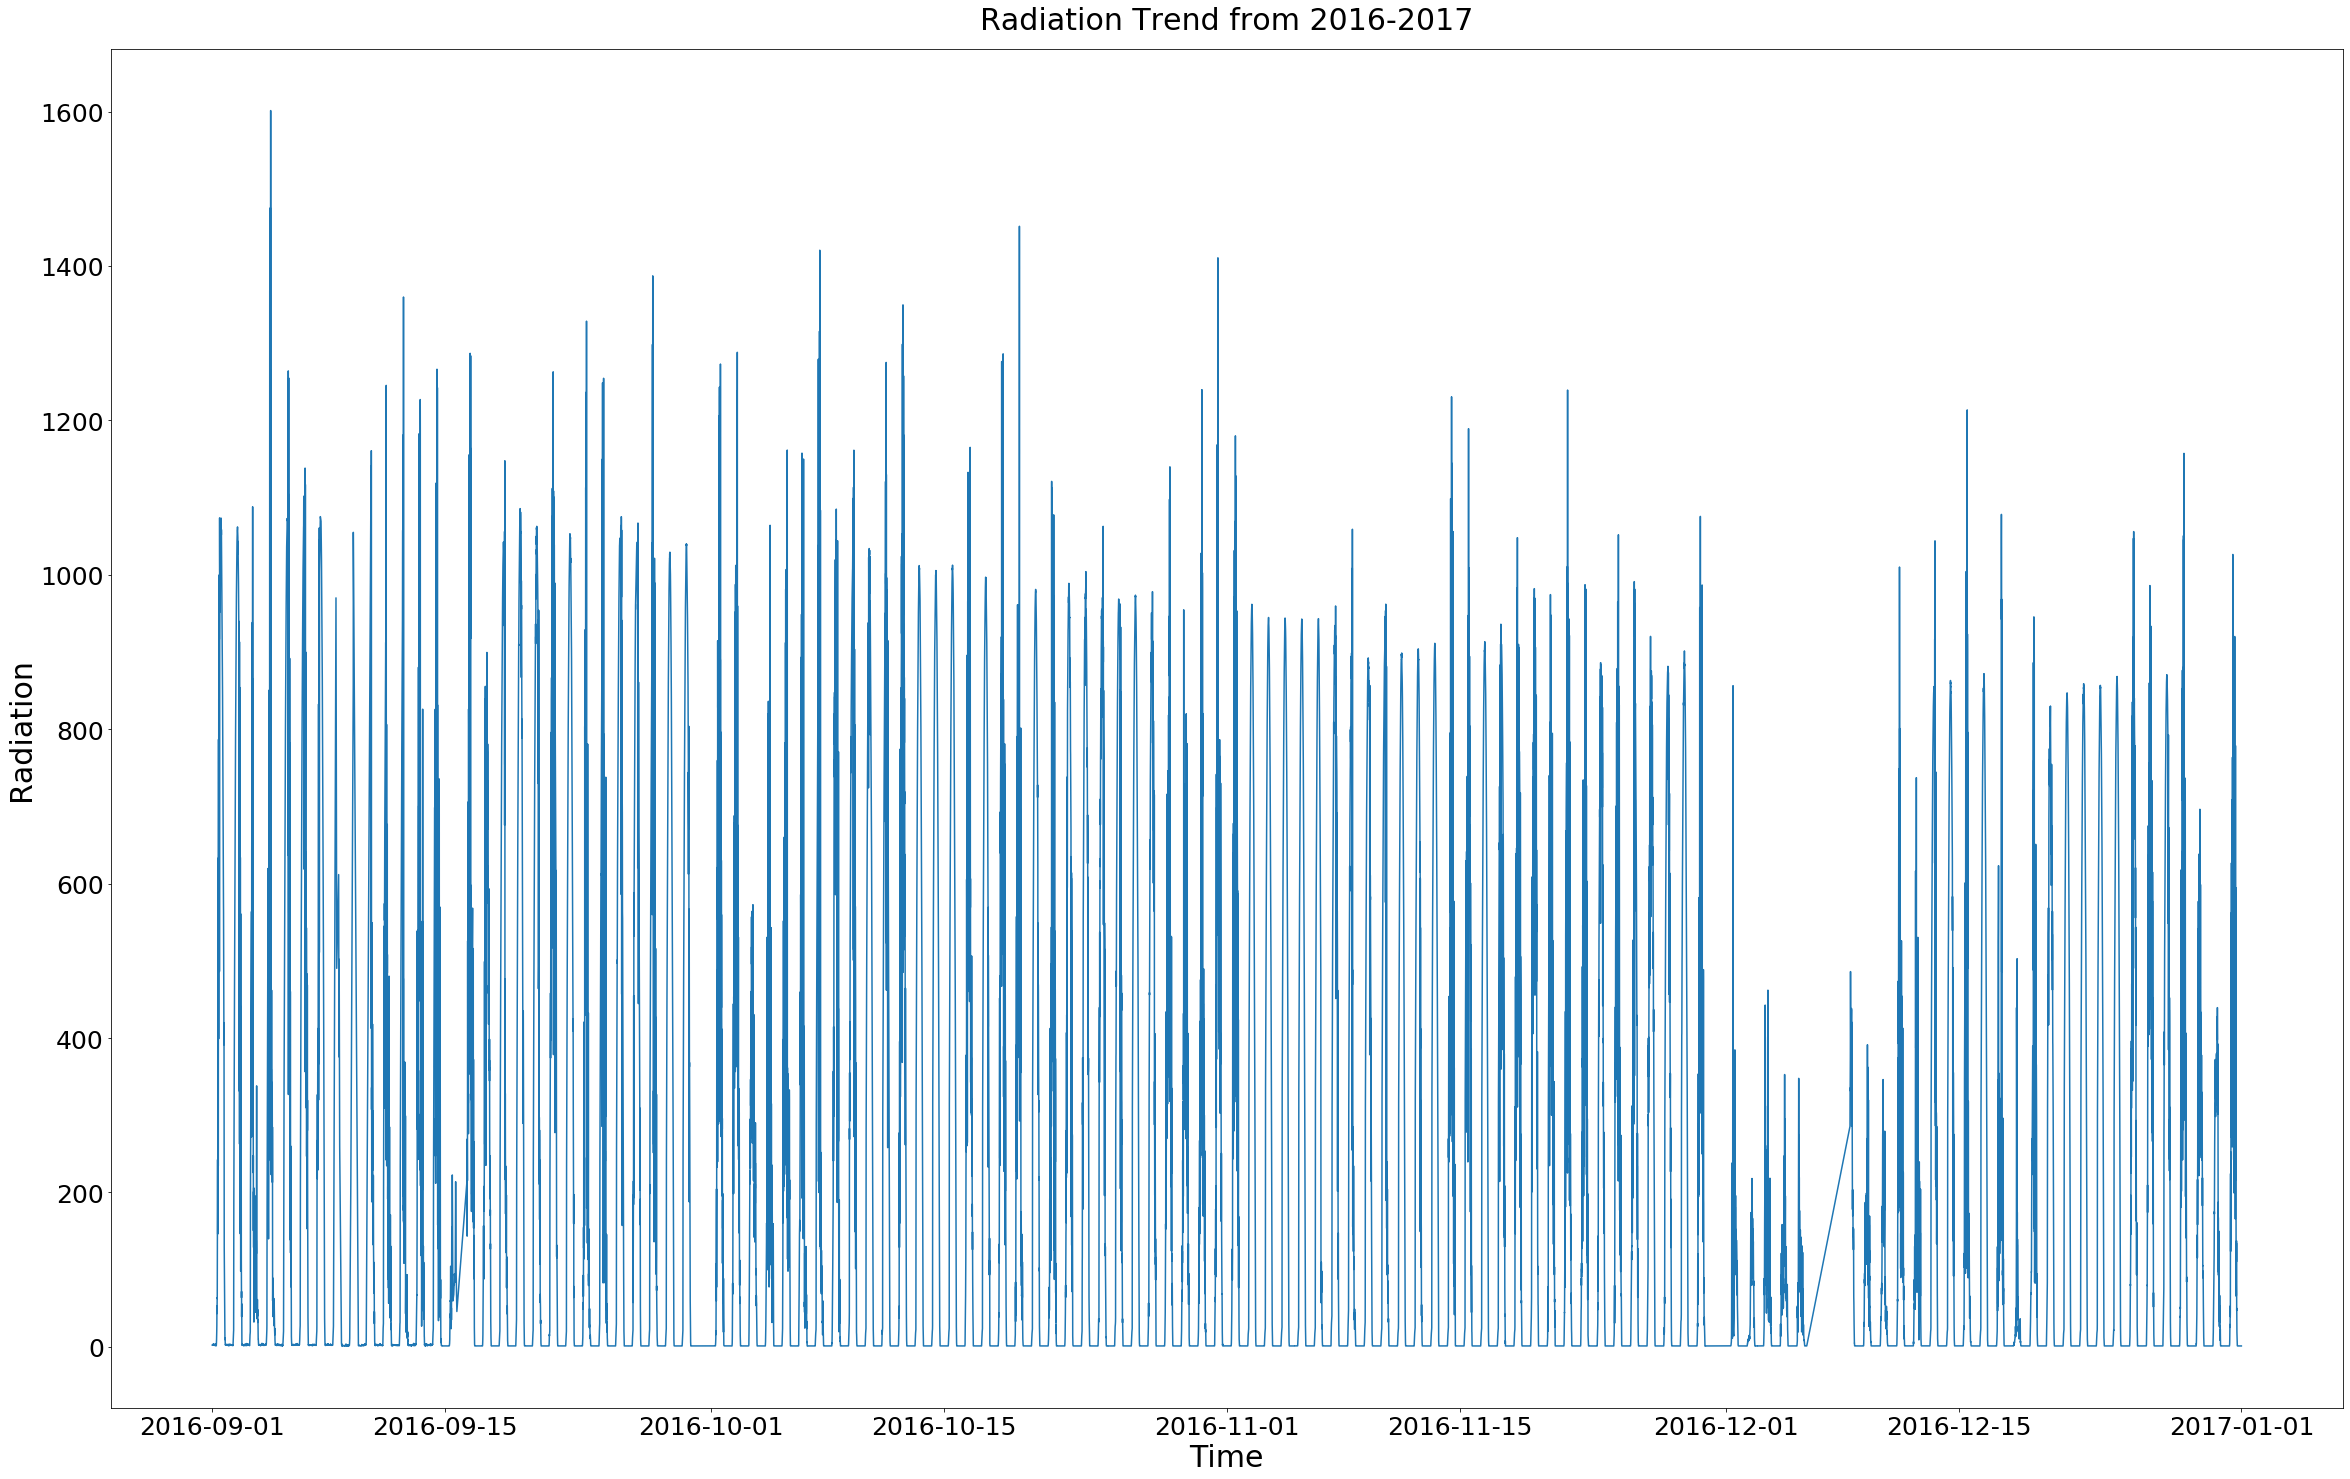

In [30]:
# Plot of data from 2016-2017
data_viz = data.sort_values('Date-Time', ascending = True)
data_viz.head(15)

plt.figure(figsize = (40,25))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(data_viz['Date-Time'], data_viz['Radiation'])

plt.title('Radiation Trend from 2016-2017', fontsize = 30, y = 1.01)
plt.xlabel('Time', fontsize = 30)
plt.xticks(fontsize = 25)
plt.ylabel('Radiation', fontsize = 30)
plt.yticks(fontsize = 25)

Text(0.5, 1, 'Correlation Table')

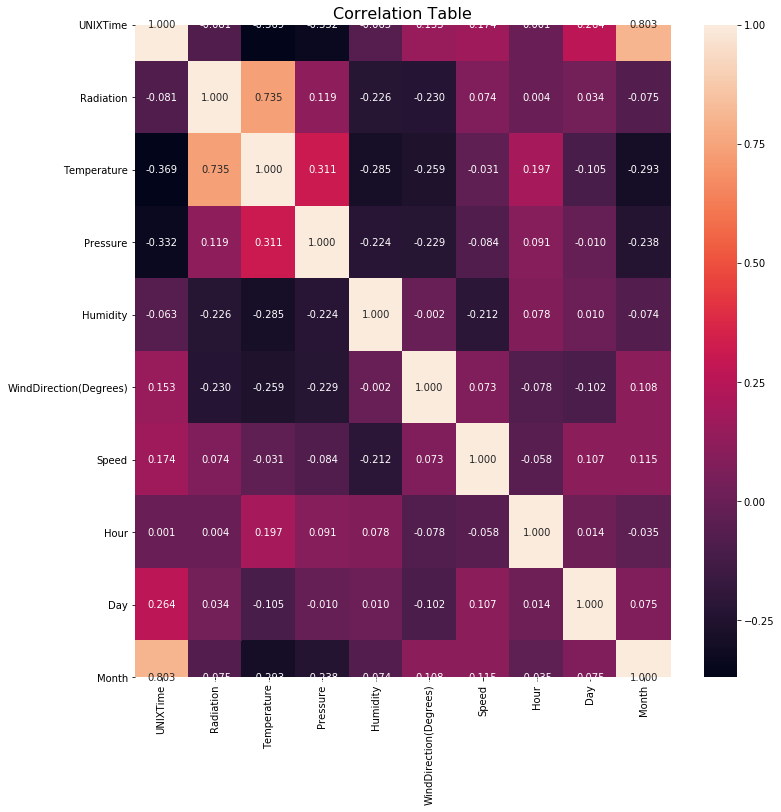

In [32]:
# Correlation for each features with the Radiation
plt.figure(figsize = (12,12))
sns.heatmap(dataset.corr(), annot = True, fmt = '.3f')

plt.title('Correlation Table', fontsize = 16)